In [1]:
library(tidyverse)
library(sf)
library(mapview)
library(rvest)
library(httr)
library(ggplot2)
library(ggmap)
library(maps)
library(ggsn)
library(geosphere)
library(dplyr)
library(RColorBrewer)
library(readxl)
library(leaflet)
library(leaflet.extras)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.

Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Loading required package: grid



In [2]:
Bluephone_location <- read_csv("data/Bluephone Locations My Map Downloaded with coordinates.csv")
head(Bluephone_location)

Rows: 89 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Formal_Name_and_Room, Street_Address
dbl (2): Latitude, Longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Formal_Name_and_Room,Street_Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Blue Phone 01 ANSOC @ Northwest Marine Drive,6303 N W MARINE DR at ANSOC Building,49.26973,-123.2572
Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,Main Mall & Crescent Road,49.26894,-123.2566
Blue Phone 04 Wyman Plaza @ Main Mall & Memorial Road,Main Mall & Memorial Road,49.26777,-123.2550
Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,2008 LOWER MALL Ponderosa Annex F,49.26497,-123.2575
Blue Phone 06 Ponderosa A @ West Mall & Agricultural Road,2011 WEST MALL Ponderosa Annex A,49.26534,-123.2562
Blue Phone 07 Hennings @ East Mall & Agricultural Road,6224 AGRICULTURAL RD/EAST MALL Hennings Bldg,49.26697,-123.2518


In [3]:
Bluephone_location <- Bluephone_location |>
    mutate(across(Longitude, as.double))

In [4]:
head(Bluephone_location)

Formal_Name_and_Room,Street_Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Blue Phone 01 ANSOC @ Northwest Marine Drive,6303 N W MARINE DR at ANSOC Building,49.26973,-123.2572
Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,Main Mall & Crescent Road,49.26894,-123.2566
Blue Phone 04 Wyman Plaza @ Main Mall & Memorial Road,Main Mall & Memorial Road,49.26777,-123.2550
Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,2008 LOWER MALL Ponderosa Annex F,49.26497,-123.2575
Blue Phone 06 Ponderosa A @ West Mall & Agricultural Road,2011 WEST MALL Ponderosa Annex A,49.26534,-123.2562
Blue Phone 07 Hennings @ East Mall & Agricultural Road,6224 AGRICULTURAL RD/EAST MALL Hennings Bldg,49.26697,-123.2518


In [5]:
base_map <- leaflet() %>%
    addTiles() %>%
    fitBounds(-123.22,49.263,-123.28,49.27)

#base_map

In [6]:
# save the map view
mapshot(base_map, file = "Map Image Save/base map.png")

<!-- mapshot(base_map, file = "Map Image Save/base map.png") -->
<img src="Map Image Save/base map.png" width="600" height="300">

In [7]:
bluephone_map <- leaflet(data = Bluephone_location) %>%
    addTiles() %>%
    fitBounds(-123.22,49.263,-123.28,49.27) %>%
    addMarkers(lng = ~Longitude, 
               lat = ~Latitude, 
               popup = ~Street_Address, label = ~Formal_Name_and_Room)

#bluephone_map

In [8]:
# save the map view
mapshot(bluephone_map, file = "Map Image Save/bluephone map.png")

<!-- mapshot(base_map, file = "Map Image Save/base map.png") -->
<img src="Map Image Save/bluephone map.png" width="600" height="300">

In [9]:
# heatmap of bluephone density
bluephone_heatmap <- addHeatmap(base_map, lng = ~Longitude, lat = ~Latitude,  intensity = 0.1,
    layerId = NULL, group = NULL, minOpacity = 0.05, max = 0.05,
    radius = 20, blur = 25, gradient = NULL, cellSize = 10,
    data = Bluephone_location)

#bluephone_heatmap

In [10]:
# save the map view
mapshot(bluephone_heatmap, file = "Map Image Save/bluephone heatmap.png")

<!-- mapshot(base_map, file = "Map Image Save/base map.png") -->
<img src="Map Image Save/bluephone heatmap.png" width="600" height="300">

In [11]:
head(Bluephone_location)

Formal_Name_and_Room,Street_Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Blue Phone 01 ANSOC @ Northwest Marine Drive,6303 N W MARINE DR at ANSOC Building,49.26973,-123.2572
Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,Main Mall & Crescent Road,49.26894,-123.2566
Blue Phone 04 Wyman Plaza @ Main Mall & Memorial Road,Main Mall & Memorial Road,49.26777,-123.2550
Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,2008 LOWER MALL Ponderosa Annex F,49.26497,-123.2575
Blue Phone 06 Ponderosa A @ West Mall & Agricultural Road,2011 WEST MALL Ponderosa Annex A,49.26534,-123.2562
Blue Phone 07 Hennings @ East Mall & Agricultural Road,6224 AGRICULTURAL RD/EAST MALL Hennings Bldg,49.26697,-123.2518


In [12]:
library(geosphere)

In [13]:
bluephone_lon_lat <- Bluephone_location |>
    select(Longitude, Latitude)

In [14]:
first_bluephone <- Bluephone_location[89, ]
first_bluephone
first_bluephone_lon_lat <- select(first_bluephone, Longitude, Latitude)
first_bluephone_lon_lat
rest_bluephone <- Bluephone_location |>
        filter(Latitude != pull(first_bluephone, Latitude))

Bluephone_distance <- rest_bluephone |>
        group_by(Formal_Name_and_Room, Latitude, Longitude) |>
        summarize(distance = distGeo(first_bluephone_lon_lat, c(Longitude, Latitude))) |>
        arrange(distance) |>
        head(1) |>
        mutate(Bluephone_origin = pull(first_bluephone, Formal_Name_and_Room)) |>
        select(Bluephone_origin, Formal_Name_and_Room, Latitude, Longitude, distance)

colnames(Bluephone_distance) <- c("Formal_Name_and_Room", "closet_Bluephone", "Latitude", "Longitude", "distance")

Bluephone_distance

Formal_Name_and_Room,Street_Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Blue Phone 89,Saltwater Octopus House,49.27075,-123.248


Longitude,Latitude
<dbl>,<dbl>
-123.248,49.27075


`summarise()` has grouped output by 'Formal_Name_and_Room', 'Latitude'. You can
override using the `.groups` argument.


Formal_Name_and_Room,closet_Bluephone,Latitude,Longitude,distance
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Blue Phone 89,Blue Phone 88,49.27007,-123.2484,80.77666


In [15]:
bluephone_closest_distance <- as_tibble(filter(Bluephone_distance, Latitude == 1))
bluephone_closest_distance

Formal_Name_and_Room,closet_Bluephone,Latitude,Longitude,distance
<chr>,<chr>,<dbl>,<dbl>,<dbl>


In [16]:
bluephone_closest_distance <- filter(Bluephone_distance, Latitude == 1)

options(dplyr.summarise.inform = FALSE) #disable dplyr messages in code

for (i in 1:89){
    first_bluephone <- Bluephone_location[i, ]
    first_bluephone_lon_lat <- select(first_bluephone, Longitude, Latitude)
    rest_bluephone <- Bluephone_location |>
        filter(Latitude != pull(first_bluephone, Latitude))
    
    Bluephone_distance <- rest_bluephone |>
        group_by(Formal_Name_and_Room, Latitude, Longitude) |>
        summarize(distance = distGeo(first_bluephone_lon_lat, c(Longitude, Latitude))) |>
        arrange(distance) |>
        head(1) |>
        mutate(Bluephone_origin = pull(first_bluephone, Formal_Name_and_Room)) |>
        select(Bluephone_origin, Formal_Name_and_Room, Latitude, Longitude, distance)
    
    colnames(Bluephone_distance) <- c("Formal_Name_and_Room", "closet_Bluephone", "Latitude", "Longitude", "distance")
    
    bluephone_closest_distance <- bind_rows(bluephone_closest_distance, Bluephone_distance)
}

head(bluephone_closest_distance)

Formal_Name_and_Room,closet_Bluephone,Latitude,Longitude,distance
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Blue Phone 01 ANSOC @ Northwest Marine Drive,Blue Phone 62 Rose Garden Parkade Elevator Level 5,49.26945,-123.2566,55.42414
Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,Blue Phone 62 Rose Garden Parkade Elevator Level 5,49.26945,-123.2566,56.72429
Blue Phone 04 Wyman Plaza @ Main Mall & Memorial Road,Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,49.26894,-123.2566,171.26136
Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,Blue Phone 48 Fraser River Parkade South West Level 1,49.26568,-123.2583,94.76914
Blue Phone 06 Ponderosa A @ West Mall & Agricultural Road,Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,49.26497,-123.2575,103.17813
Blue Phone 07 Hennings @ East Mall & Agricultural Road,Blue Phone 41 Thunderbird Park pedestrian pathway near Soccer Centre,49.26753,-123.2527,87.78280


In [17]:
write_csv(bluephone_closest_distance, file = "data/Each Bluephone Distance with Closet.csv")

In [18]:
#rename from the formal name to index
bluephone_closest_distance_renamed <- bluephone_closest_distance |>
    mutate(Bluephone_No = substr(Formal_Name_and_Room, 11, 13)) |>
    mutate(across(Bluephone_No, as.integer)) |>
    select(Bluephone_No, closet_Bluephone, Latitude, Longitude, distance)

head(bluephone_closest_distance_renamed)

Bluephone_No,closet_Bluephone,Latitude,Longitude,distance
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,Blue Phone 62 Rose Garden Parkade Elevator Level 5,49.26945,-123.2566,55.42414
3,Blue Phone 62 Rose Garden Parkade Elevator Level 5,49.26945,-123.2566,56.72429
4,Blue Phone 03 Flagpole Plaza @ Main Mall & Crescent Road,49.26894,-123.2566,171.26136
5,Blue Phone 48 Fraser River Parkade South West Level 1,49.26568,-123.2583,94.76914
6,Blue Phone 05 Ponderosa F @ Lower Mall & Pedestrian Path,49.26497,-123.2575,103.17813
7,Blue Phone 41 Thunderbird Park pedestrian pathway near Soccer Centre,49.26753,-123.2527,87.78280


In [19]:
# calculate the mean of the distance
distance_mean <- bluephone_closest_distance_renamed |>
    pull(distance) |>
    mean()

cat("The distance between each bluephone and its closet bluephone is", distance_mean, "m.")

The distance between each bluephone and its closet bluephone is 88.23234 m.

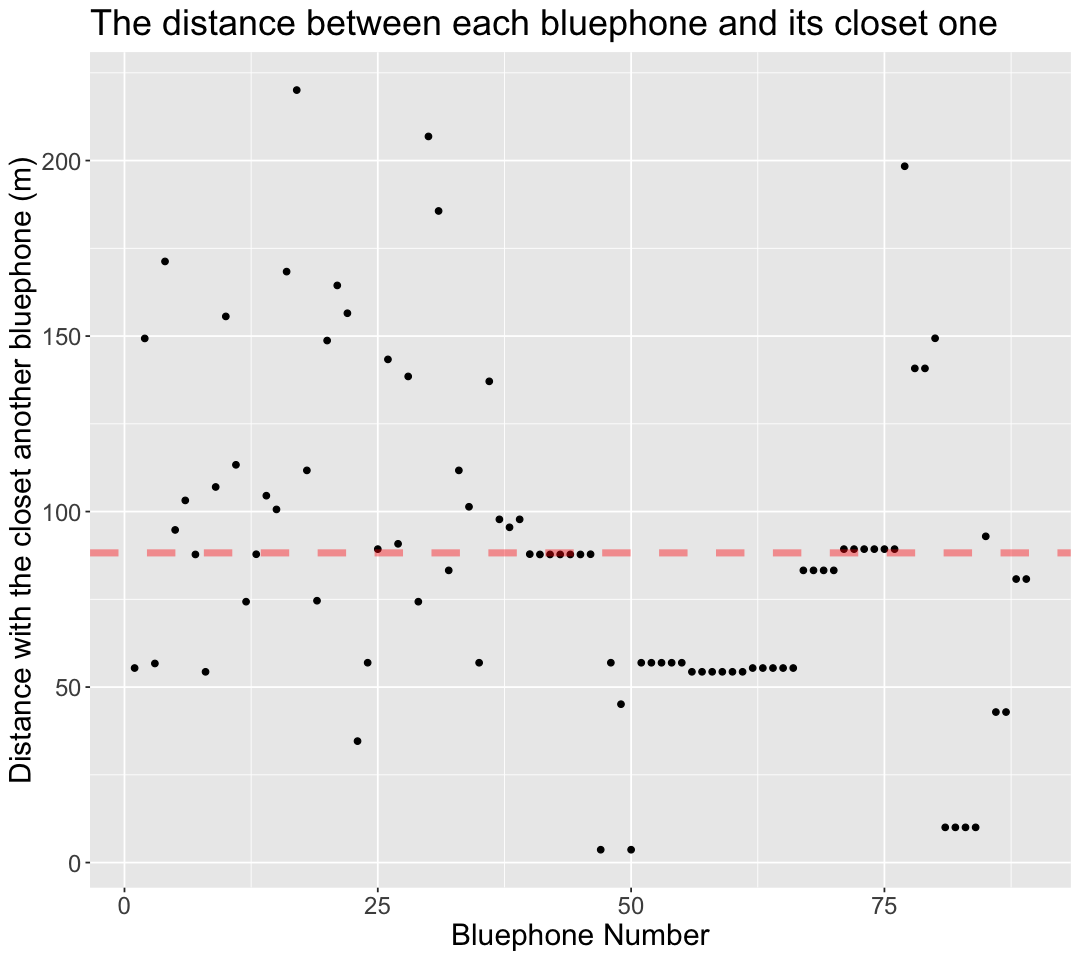

In [20]:
#plot the distance between the current bluephone and its closet one
options(repr.plot.height = 8, repr.plot.width = 9)

bluephone_closest_distance_plot <- bluephone_closest_distance_renamed |>
    ggplot(aes(x = Bluephone_No, y = distance)) +
    geom_point() +
    geom_hline(yintercept = distance_mean, linetype = "dashed", linewidth = 2, alpha = 0.4, color = "red") +
    labs(x = "Bluephone Number",
         y = "Distance with the closet another bluephone (m)") +
    ggtitle("The distance between each bluephone and its closet one") +
    theme(text = element_text(size = 18))

bluephone_closest_distance_plot

In [21]:
#find the location of the bluephone such that has the maximum distance with another one
bluephone_distance_max <- bluephone_closest_distance |>
    arrange(desc(distance)) |>
    head(1)

bluephone_distance_max

Formal_Name_and_Room,closet_Bluephone,Latitude,Longitude,distance
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Blue Phone 17 Rhododendron Wood @ Main Mall & Eagles Drive,Blue Phone 16 Old Barn Community Centre @ Main Mall & Thunderbird Blvd,49.25932,-123.2481,220.0795


In [22]:
bluephone_distance_max_location <- Bluephone_location |>
    filter(Formal_Name_and_Room %in% c("Blue Phone 17 Rhododendron Wood @ Main Mall & Eagles Drive", 
                                       "Blue Phone 16 Old Barn Community Centre @ Main Mall & Thunderbird Blvd", 
                                       "Blue Phone 30 Totem Park @ West Mall & Thunderbird Blvd",
                                       "Blue Phone 31 Tennis Centre @ Thunderbird & East Mall"))

bluephone_distance_max_location

Formal_Name_and_Room,Street_Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Blue Phone 16 Old Barn Community Centre @ Main Mall & Thunderbird Blvd,6308 THUNDERBIRD Blvd Old Barn Community Ctr,49.25932,-123.2481
Blue Phone 17 Rhododendron Wood @ Main Mall & Eagles Drive,Main Mall,49.25758,-123.2467
Blue Phone 30 Totem Park @ West Mall & Thunderbird Blvd,2525 WEST MALL & THUNDERBIRD Blvd,49.25846,-123.2507
Blue Phone 31 Tennis Centre @ Thunderbird & East Mall,6160 THUNDERBIRD BLVD & EAST MALL,49.26008,-123.2456


In [23]:
#plot the location on the map

bluephone_map_max_distance <- leaflet(data = bluephone_distance_max_location, height=400, width=400) |>
    addTiles() |>
    fitBounds(-123.246,49.257,-123.248,49.26) |>
    addMarkers(lng = ~Longitude, 
               lat = ~Latitude, 
               popup = ~Street_Address,
               label = ~Formal_Name_and_Room) |>
    addMarkers(data = bluephone_distance_max_location,
               lng = ~Longitude, 
               lat = ~Latitude,
               popup = ~Street_Address,
               label = ~Formal_Name_and_Room) |>
    addPolylines(data = bluephone_distance_max_location[1:2,], lng = ~Longitude, lat = ~Latitude) |>
    addPolylines(data = bind_rows(bluephone_distance_max_location[2, ],
                                  bluephone_distance_max_location[3, ]), 
                 lng = ~Longitude, lat = ~Latitude) |>
    addPolylines(data = bind_rows(bluephone_distance_max_location[2, ],
                                  bluephone_distance_max_location[4, ]), 
                 lng = ~Longitude, lat = ~Latitude) |>
    addScaleBar()


#bluephone_map_max_distance

In [24]:
# mapview image save
mapshot(bluephone_map_max_distance, file = "Map Image Save/Longest_Bluephone_Map.png")

<!-- mapshot(base_map, file = "Map Image Save/base map.png") -->
<img src="Map Image Save/Longest_Bluephone_Map.png" width="600" height="300">